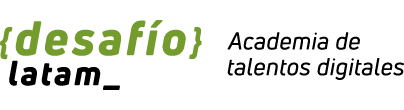

#<center><font color='green'>Clasificación (parte II)</font></center>

Como siempre, cargamos las bibliotecas necesarias.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.datasets import make_circles

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize']=(10, 6)

##<font color='green'>Regresión logística</font>
###<font color='green'>Función sigmoide</font>

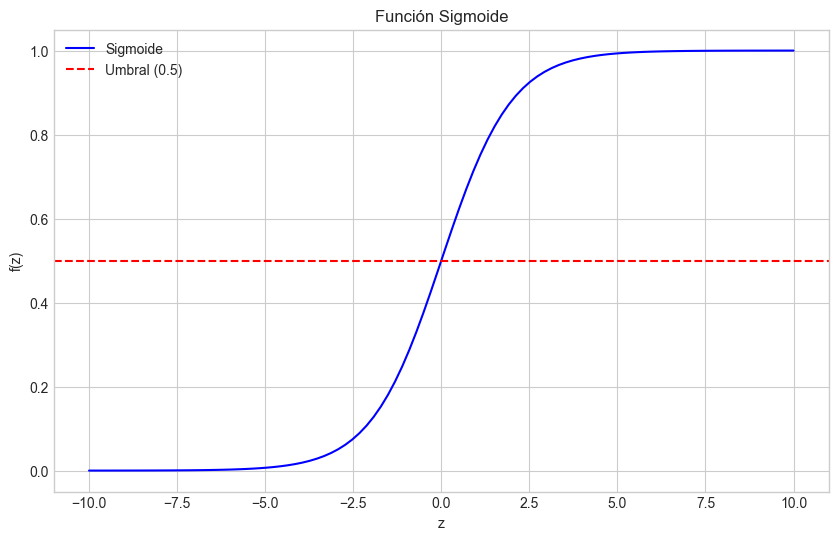

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generar valores para el eje x (z)
z = np.linspace(-10, 10, 100)

# Calcular los valores de la función sigmoide para cada valor de z
sig_values = sigmoid(z)

# Plot de la función sigmoide
plt.plot(z, sig_values, label='Sigmoide', color='b')
plt.axhline(0.5, color='r', linestyle='--', label='Umbral (0.5)')
plt.xlabel('z')
plt.ylabel('f(z)')
plt.title('Función Sigmoide')
plt.legend()
plt.grid(True)
plt.show()


###<font color='green'>Aplicación</font>

Veremos ahora como aplicar nuestro modelo de regresión logística.

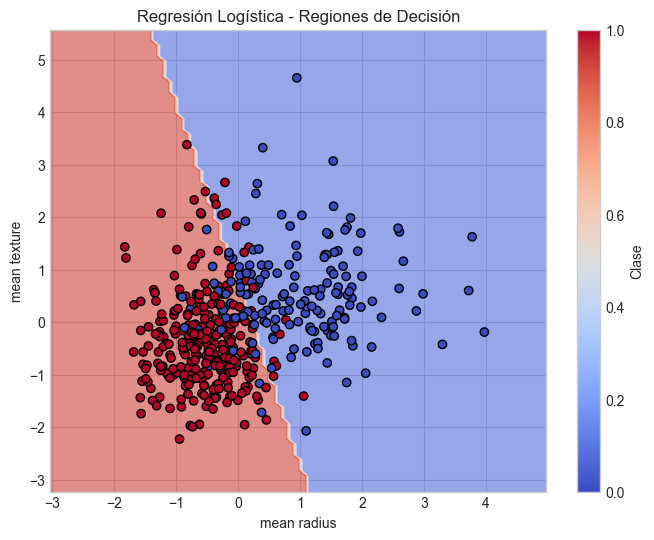

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Cargar el conjunto de datos
data = load_breast_cancer()
X, y = data.data, data.target

# Escalar las características para que tengan media 0 y desviación estándar 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

'''
Seleccionar solo dos características para el plot
En este caso, se eligen las características en los índices 0 y 1
de las características escaladas.
'''
feature1_idx = 0
feature2_idx = 1
X_2d = X_scaled[:, [feature1_idx, feature2_idx]]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Obtener los coeficientes y el intercepto del modelo
#Estos coeficientes son utilizados para definir las fronteras de decisión.
coeficientes = model.coef_
intercepto = model.intercept_

'''
Crear un meshgrid para el plot. que abarca el rango de valores de las dos
características seleccionadas. Esto permitirá generar una cuadrícula en el
espacio de características.
'''
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

'''
Predecir las clases para cada punto del meshgrid utilizando los coeficientes y
el intercepto. Luego, se reformatean las predicciones en una matriz (Z)
que coincide con las dimensiones del meshgrid.
'''

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

'''
Se realiza un plot de las regiones de decisión y los puntos de entrenamiento
usando contourf, que muestra áreas coloreadas que representan las clases
asignadas por el modelo. Además, se plotean los puntos de entrenamiento
coloreados según sus clases.
'''
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel(data.feature_names[feature1_idx])
plt.ylabel(data.feature_names[feature2_idx])
plt.title("Regresión Logística - Regiones de Decisión")
plt.colorbar(label="Clase")
plt.show()


###<font color='green'>Ventajas y desventajas</font>
####Ventajas
-  **Eficiente y fácil de implementar:** La regresión logística es un algoritmo relativamente simple y computacionalmente eficiente. Es fácil de implementar y entender, lo que lo hace una buena opción para problemas de clasificación binaria.

-  **Interpretación de coeficientes:** Los coeficientes estimados en la regresión logística proporcionan información sobre la influencia y dirección de cada variable predictora en la probabilidad de pertenecer a una clase. Esto permite una interpretación más clara de las relaciones entre las características y la variable objetivo.

-  **Flexibilidad en la selección de características:** Puede trabajar con una variedad de tipos de variables, incluidas variables categóricas y numéricas, y se puede utilizar para realizar selección de características mediante la inclusión o exclusión de variables predictivas.

-  **Modelo probabilístico:** La regresión logística proporciona probabilidades de clasificación en lugar de simplemente clases, lo que permite obtener información más detallada sobre las predicciones. Estas probabilidades pueden ser útiles en contextos donde se requiere información de confianza en las predicciones.

####Desventajas
-  **No es adecuado para relaciones no lineales complejas:** La regresión logística es un modelo lineal, lo que significa que no puede capturar relaciones no lineales complejas entre las variables predictoras y la variable objetivo. Para problemas con relaciones no lineales, se deben considerar otros algoritmos más complejos.

- **Sensibilidad a características irrelevantes o colineales:** La presencia de características irrelevantes o altamente colineales puede afectar negativamente el rendimiento de la regresión logística, ya que puede introducir ruido en el modelo y afectar la interpretación de los coeficientes.

-  **Requiere una cantidad suficiente de datos:** La regresión logística puede requerir una cantidad suficiente de datos de entrenamiento para estimar los coeficientes de manera confiable y evitar el sobreajuste.

##<font color='green'>Support vector machine</font>

**Problema:** Encontrar un hiperplano que separe los diferentes grupos. El problema es que hay infinitos hiperplanos que pueden separar los datos, como vemos a continuación.


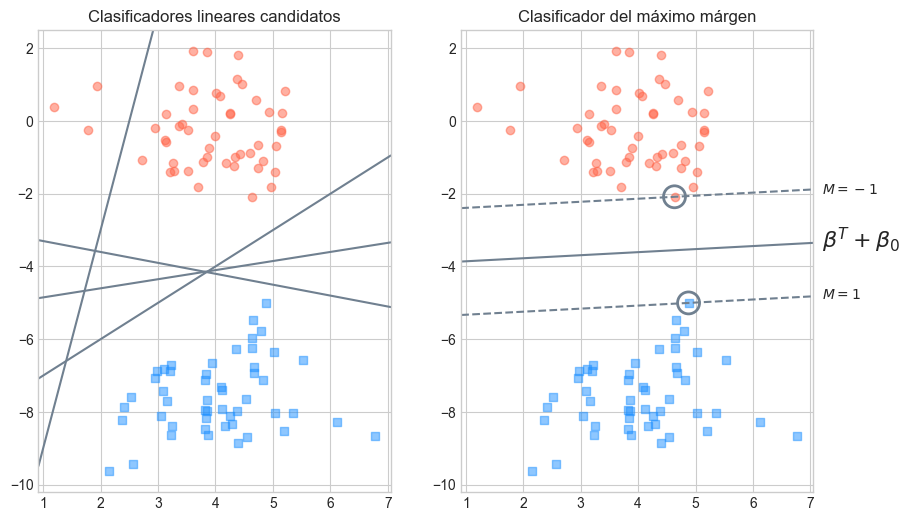

In [ ]:
def setup_svm_problem():
    """
    Esta función realiza el setup y la visualización de dos subplots en una
    figura de matplotlib. Estos subplots representan los clasificadores lineales
    candidatos y el clasificador de máximo margen, que son utilizados para
    ilustrar el concepto de SVM.
    """

    '''
    En el siguiente subplot se generan puntos utilizando la función make_blobs,
    creando dos grupos de puntos con diferentes colores. Luego, se trazan líneas
    con diferentes pendientes e interceptos para representar posibles
    clasificadores lineales. Los puntos en los dos grupos están coloreados
    según sus clases.
    '''

    plt.subplot(1, 2, 1)
    X, y = make_blobs(random_state=754, cluster_std=1, centers=2)
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], marker='s', color='dodgerblue', alpha=.5)
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], marker='o', color='tomato', alpha=.5)
    get_xlim = plt.xlim()
    get_ylim = plt.ylim()

    x_range = np.linspace(get_xlim[0], get_xlim[1])

    for slope, intercept in [(1, -8), (.25, -5.1), (-.3, -3), (6, -15)]:
        plt.plot(x_range, slope * x_range + intercept, color='slategrey')
        plt.ylim(get_ylim)
        plt.xlim(get_xlim)
    plt.title('Clasificadores lineares candidatos')

    '''
    En el siguiente subplot se generan nuevamente los puntos y se entrena un
    modelo de SVC (Support Vector Classifier) con kernel lineal y parámetro de
    regularización C igual a 1. Se calculan los valores de decisión en un
    meshgrid y se trazan las regiones de decisión utilizando plt.contour.
    Además, se marcan los vectores de soporte del modelo con círculos vacíos.
    '''

    plt.subplot(1, 2, 2)
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], marker='s', color='dodgerblue', alpha=.5)
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], marker='o', color='tomato', alpha=.5)
    model = SVC(kernel='linear', C=1).fit(X, y)

    tmp_y, tmp_x = np.meshgrid(np.linspace(get_ylim[0], get_ylim[1]),
                               np.linspace(get_xlim[0], get_xlim[1]))
    joint_xy = np.vstack([tmp_x.ravel(), tmp_y.ravel()]).T
    tmp_z = model.decision_function(joint_xy).reshape(tmp_x.shape)

    plt.contour(tmp_x, tmp_y, tmp_z, colors='slategrey', levels=[-1, 0, 1], linestyles=['--','-','--'])
    plt.scatter(model.support_vectors_[:,0],
                model.support_vectors_[:, 1],
                s=250, linewidth=2, facecolor='none',
                edgecolor='slategrey')
    plt.title('Clasificador del máximo margen')
    plt.text(7.2, -2, r'$M=-1$')
    plt.text(7.2, -4.9, r'$M=1$')
    plt.text(7.2, -3.5, r'$\beta^{T} + \beta_{0}$', size=16)


'''
Finalmente, se llama a la función setup_svm_problem() para crear la
visualización con los dos subplots.
'''

setup_svm_problem()

Lo que nos interesa es encontrar el hiperplano que maximiza el margen entre los vectores de soporte (indicados con M = 1 y M = -1). El hiperplano debe cumplir la siguiente condición: $$x: f\left(x\right)=X^{T}β+\beta_{0}=0$$

El plano satisface una función lineal y divide el espacio en las 2 categorías.
Si una nueva muestra está sobre el hiperplano es de una categoría y si está debajo es de la otra categoría.

##<font color='green'>Hiperparámetros</font>

Este algoritmo tiene varios hiperparametros que son útiles para dar flexibilidad a los vectores de soporte respecto a la disposición de los puntos. Entre ellos están:

1.  **C:** El parámetro C es un factor de penalización por errores de clasificación en el conjunto de entrenamiento.

2.  **Gamma:** El parámetro gamma define hasta dónde llega la influencia de un solo ejemplo de entrenamiento. Esto significa que Gamma alto considerará solo puntos cercanos al hiperplano plausible y Gamma bajo considerará puntos a mayor distancia.

3.  **Kernel:** El kernel es una función matemática que se utiliza para transformar el espacio de características original a uno de mayor dimensión, donde los datos pueden ser más separables.

### C penalización

Se trata de un valor que penaliza las muestras mal clasificadas.

Un valor alto puede mejorar la performance en entrenamiento, pero puede llevar a overfitting.


In [ ]:
'''
Creamos una función que  toma una matriz como entrada y devuelve los valores
mínimo y máximo de esa matriz redondeados hacia abajo y hacia arriba,
respectivamente.
'''

fetch_lims = lambda x: [np.floor(np.min(x)), np.ceil(np.max(x))]

'''
La siguiente función calcula coordenadas para un meshgrid a partir de los
límites de x e y proporcionados. Luego, crea una matriz joint_xy que contiene
pares de coordenadas x, y. Devuelve tanto el meshgrid x_mesh y y_mesh, como la
matriz joint_xy.
'''

def get_joint_xy(xlim, ylim):

    x_mesh, y_mesh = np.meshgrid(
        np.linspace(xlim[0], xlim[1]),
        np.linspace(ylim[0], ylim[1])
    )

    joint_xy = np.vstack([
        x_mesh.ravel(),
        y_mesh.ravel()
    ]).T
    return x_mesh, y_mesh, joint_xy

'''
La siguiente función genera datos para el problema XOR lógico utilizando números
 aleatorios. Crea puntos en un espacio bidimensional y asigna etiquetas 1 a
 puntos que cumplen la condición XOR y -1 a los demás.
'''

def svm_logical_xor_data(nsize=400, random_state=11238):
    np.random.seed(random_state)
    x_xor = np.random.randn(nsize, 2)
    y_xor = np.logical_xor(x_xor[:, 0] > 0, x_xor[:, 1] > 0)
    y_xor = np.where(y_xor, 1, -1)
    return x_xor, y_xor

In [ ]:
'''
La siguiente función realiza un análisis de clasificación utilizando SVM con
kernel RBF y diferentes valores de hiperparámetro C. Para cada valor de C en el
rango c_range, crea un gráfico que muestra los puntos de datos coloreados según
sus clases, así como regiones de decisión del modelo SVM. La densidad de las
regiones de decisión se muestra mediante contornos.
'''


def svm_c_hyperparameter(X, y, c_range = [0.0001, 0.1, 1000]):
    get_xlim = fetch_lims(X[:, 0])
    get_ylim = fetch_lims(X[:, 1])
    x_mesh, y_mesh, joint_xy = get_joint_xy(get_xlim, get_ylim)

    for index, c in enumerate(c_range):
        if len(c_range) > 3:
            plt.subplot(2, 3, index + 1)
        else:
            plt.subplot(1, 3, index + 1)
        tmp_model = SVC(kernel = 'rbf', C=c, gamma=.01).fit(X, y)
        tmp_densities = tmp_model.decision_function(joint_xy).reshape(x_mesh.shape)
        plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='orange', alpha=.8, s=25, marker='s')
        plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='dodgerblue', alpha=.8, s=25, marker='o')
        plt.contourf(x_mesh, y_mesh, tmp_densities, cmap='Greys', alpha=.5)
        plt.title("C: {}".format(c), fontsize=18)
        plt.tight_layout()

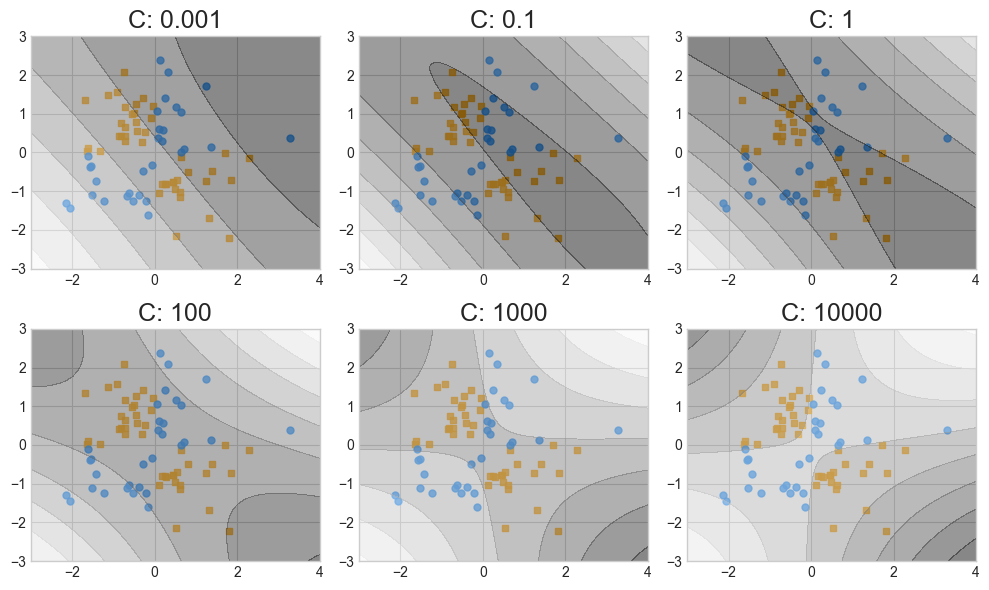

In [ ]:
'''
Se llama a la función svm_logical_xor_data con un tamaño de muestra (nsize) de
75 para generar datos para el problema XOR lógico. Los datos generados consisten
 en un conjunto de puntos bidimensionales (X) y sus correspondientes
 etiquetas (y).
'''
X, y = svm_logical_xor_data(nsize=75) # 1000,


'''
Se llama a la función svm_c_hyperparameter para realizar un análisis de
clasificación utilizando SVM con kernel RBF y diferentes valores de
hiperparámetro C. Los argumentos pasados a la función son los datos generados
(X y y) y una lista de valores de C a explorar (c_range). Esta función generará
gráficos para cada valor de C en la lista c_range.
'''
svm_c_hyperparameter(X, y, c_range=[0.001, 0.1, 1, 100, 1000, 10000])

### Gamma

El parámetro gamma define hasta dónde llega la influencia de un solo ejemplo de entrenamiento.

-  Una Gamma muy alto puede llevar al overfitting.

-   Este parámetro se utiliza en conjunto con los kernel (que se verán pronto).



In [ ]:

'''
La siguiente función realiza un análisis de clasificación utilizando SVM con kernel RBF
y diferentes valores de hiperparámetro gamma. Los argumentos pasados a la
función son los datos generados (X y y) y una lista de valores de gamma
a explorar (gamma_range).
'''

def svm_gamma_hyperparameter(X, y, gamma_range=[0.0001, 0.1, 1000]):
    '''
    Al igual que en la función anterior, se generan coordenadas y un meshgrid
    utilizando las funciones fetch_lims y get_joint_xy.
    '''
    get_xlim = fetch_lims(X[:, 0])
    get_ylim = fetch_lims(X[:, 1])
    x_mesh, y_mesh, joint_xy = get_joint_xy(get_xlim, get_ylim)

    '''
    Iteramos a través de los valores en gamma_range. Para cada valor de gamma,
    se entrena un modelo SVM con kernel RBF y parámetros gamma y C especificados.
    Luego, se calculan las densidades y se trazan los puntos de datos coloreados
    según sus clases. Las regiones de decisión se representan mediante contornos.
    '''
    for index, g in enumerate(gamma_range):
        if len(gamma_range) > 3:
            plt.subplot(2, 3, index + 1)
        else:
            plt.subplot(1, 3, index + 1)
        tmp_model = SVC(kernel = 'rbf', gamma=g, C=1).fit(X, y)
        tmp_densities = tmp_model.decision_function(joint_xy).reshape(x_mesh.shape)
        plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='orange', alpha=.8, s=25, marker='s')
        plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='dodgerblue', alpha=.8, s=25, marker='o')
        plt.contourf(x_mesh, y_mesh, tmp_densities, cmap='Greys', alpha=.5)
        plt.title("Gamma: {}".format(g), fontsize=18)
        plt.tight_layout()

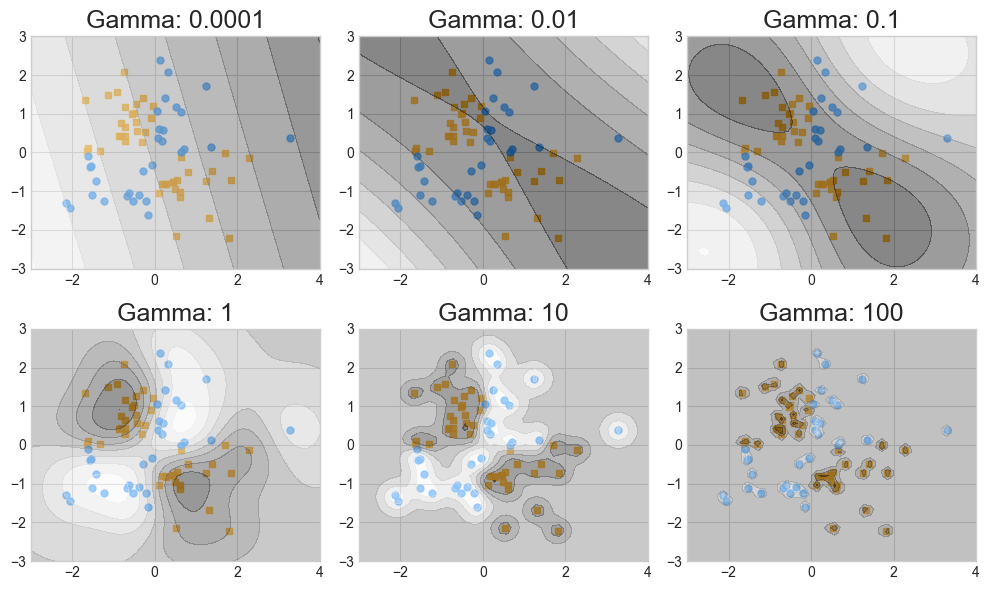

In [ ]:
'''
Se llama a la función svm_gamma_hyperparameter para realizar un análisis de
clasificación utilizando SVM con kernel RBF y diferentes valores de
hiperparámetro gamma. Los argumentos pasados a la función son los datos
generados para el problema XOR lógico (X y y) y una lista de valores de gamma a
explorar (gamma_range). La función generará gráficos para cada valor de gamma
en la lista.
'''
svm_gamma_hyperparameter(X, y, gamma_range=[0.0001, 0.01,0.1, 1, 10, 100])

### Kernel

Función que reexpresa los datos originales a otro espacio donde si sean linealmente separables. Algunas posibilidades son:

-  linear
-  Rbf
-  poly
-  sigmoid


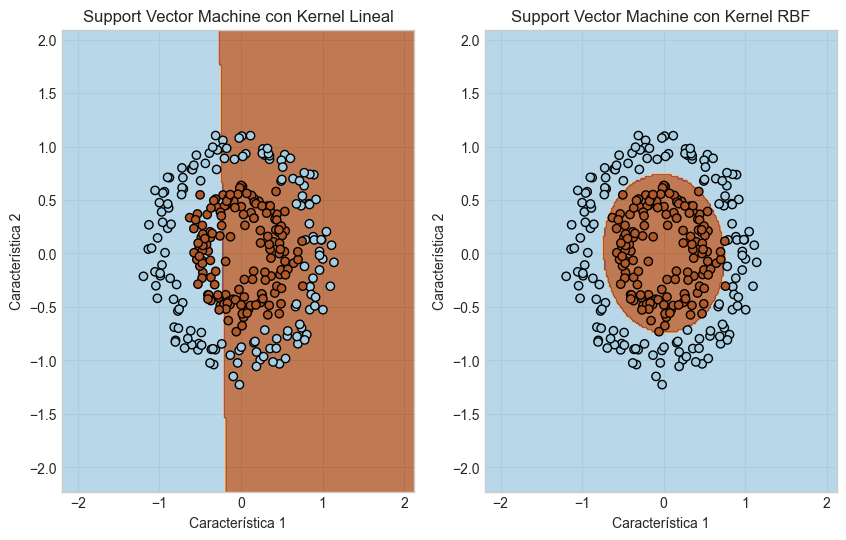

In [ ]:
# Generar el conjunto de datos de círculos concéntricos
X, y = make_circles(n_samples=300, noise=0.1, random_state=42, factor=0.5)


'''
En el siguiente subplot, se crea y entrena un modelo SVM con kernel lineal
utilizando la función SVC. Luego, se predice la clase para todo el espacio de
características utilizando un meshgrid. Las predicciones se trazan como regiones
coloreadas mediante la función contourf, y los puntos de datos se trazan como
puntos individuales coloreados según sus etiquetas. Se agrega un título y
etiquetas de eje para el subplot.
'''
plt.subplot(1,2, 1)
# Crear el modelo SVM con el kernel RBF (gaussiano)
model = SVC(kernel='linear', gamma=1)
# Entrenar el modelo
model.fit(X, y)
# Predecir las clases para todo el espacio de características
h = 0.02  # Tamaño del paso en el meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Plot del resultado
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Support Vector Machine con Kernel Lineal')


'''
En este subplot, se crea y entrena un modelo SVM con kernel RBF utilizando la
función SVC con el argumento kernel='rbf'. Luego, se predice la clase para todo
el espacio de características y se realizan trazados similares al subplot
anterior.
'''
plt.subplot(1,2, 2)
# Crear el modelo SVM con el kernel RBF (gaussiano)
model = SVC(kernel='rbf', gamma=1)
# Entrenar el modelo
model.fit(X, y)
# Predecir las clases para todo el espacio de características
h = 0.02  # Tamaño del paso en el meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Plot del resultado
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Support Vector Machine con Kernel RBF')
plt.show()

plt.show()


### Ventajas y desventajas de Support Vector Machine

**Ventajes**

-  **Eficiente en espacios de alta dimensión:** SVM funciona bien en espacios de características de alta dimensión, incluso cuando el número de muestras es menor que el número de características.

-  **Buena generalización:** SVM tiende a tener un buen rendimiento en datos de prueba, lo que indica una buena capacidad de generalización.

-  **Flexibilidad del kernel:** SVM se puede utilizar con diferentes funciones de kernel (lineal, polinómica, radial, sigmoide, etc.), lo que le permite manejar relaciones no lineales entre las características y la variable objetivo.

**Desventajas**

-  **Sensibilidad a la escala de características:** SVM es sensible a la escala de las características, por lo que es importante escalar los datos antes de aplicar SVM.

-  **Toma de decisiones complicada de interpretar:** A diferencia de la regresión logística o los árboles de decisión, la toma de decisiones detrás del SVM puede ser más complicada de interpretar, especialmente en espacios de alta dimensión con funciones de kernel no lineales.

##<font color='green'>Métricas - ROC AUC</font>
Recordando la matriz de confusión, tenemos que:

<style>
  table {
    width: 100%;
    border: 2px solid black;
  }

  th, td {
    border: 2px solid black;
    padding: 8px;
    text-align: left;
  }

  th {
    background-color: #f2f2f2;
  }
</style>



<center>
<table>
  <tr>
    <th></th>
    <th colspan="3">Valor predicho</th>
  </tr>
  <tr>
    <th rowspan="3">Valor Real</th>
    <th></th>
    <th>Class = Yes</th>
    <th>Class = No</th>
  </tr>
  <tr>
    <td>Class = Yes</td>
    <td>a(TP)</td>
    <td>b(FN)</td>
  </tr>
  <tr>
    <td>Class = No</td>
    <td>c(FP)</td>
    <td>d(TN)</td>
  </tr>  
</table>
</center>

$$accuracy=\frac{a+b}{a+b+c+d}$$
$$recall=\frac{a}{a+c}$$
$$precision=\frac{a}{a+b}$$
$$f1=\frac{2rp}{r+p}$$

El área bajo la curva **(Area under the curve)** se utiliza para medir la performance de un clasificación binaria y se calcula en base a la curva ROC.

La Curva ROC es una representación gráfica de los verdaderos positivos y la tasa de falsos positivos.


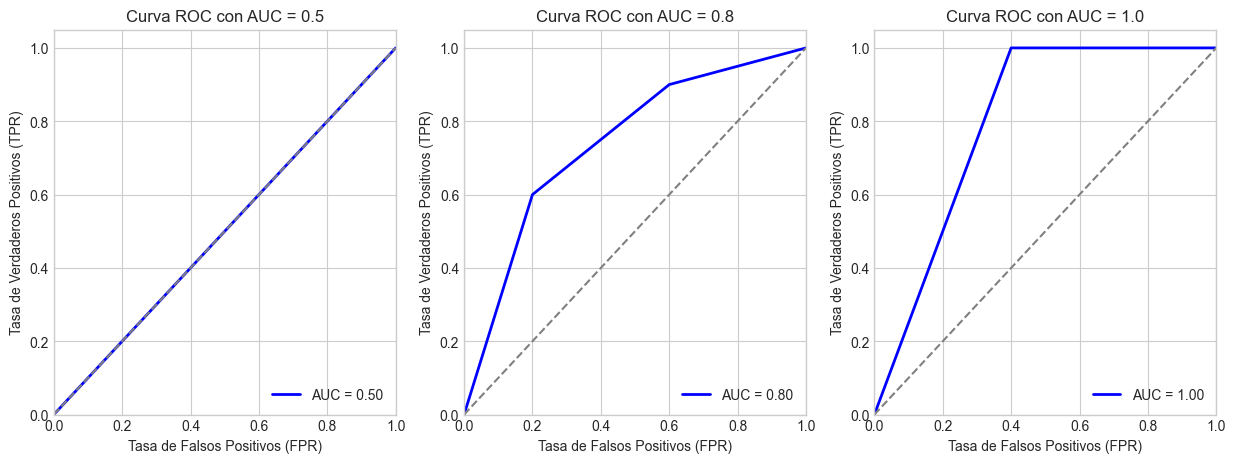

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
# Datos de la curva ROC con AUC de 0.5
fpr = [0, 1]
tpr = [0, 1]
auc = 0.5

# Graficar la curva ROC
plt.plot(fpr, tpr, color='blue', lw=2, label='AUC = {:.2f}'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC con AUC = 0.5')
plt.legend(loc='lower right')

plt.subplot(1, 3, 2)

# Datos de la curva ROC con AUC de 0.8
fpr = [0, 0.2, 0.6, 1]
tpr = [0, 0.6, 0.9, 1]
auc = 0.8

# Graficar la curva ROC
plt.plot(fpr, tpr, color='blue', lw=2, label='AUC = {:.2f}'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC con AUC = 0.8')
plt.legend(loc='lower right')


plt.subplot(1, 3, 3)
# Datos de la curva ROC con AUC de 1.0
fpr = [0, 0.4, 0.6, 0.9, 0.95, 1]
tpr = [0, 1 , 1, 1, 1, 1]
auc = 1.0

# Graficar la curva ROC
plt.plot(fpr, tpr, color='blue', lw=2, label='AUC = {:.2f}'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC con AUC = 1.0')
plt.legend(loc='lower right')

plt.show()

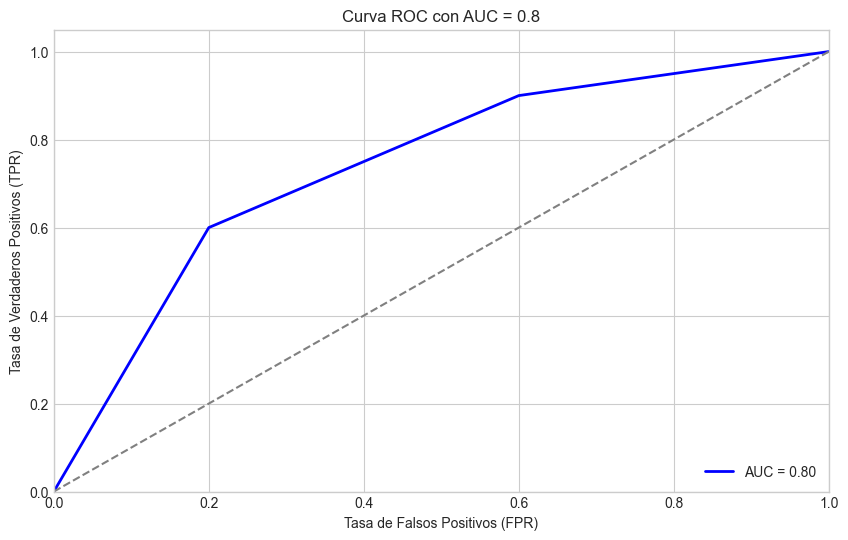

In [ ]:

# Datos de la curva ROC con AUC de 0.8
fpr = [0, 0.2, 0.6, 1]
tpr = [0, 0.6, 0.9, 1]
auc = 0.8

# Graficar la curva ROC
plt.plot(fpr, tpr, color='blue', lw=2, label='AUC = {:.2f}'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC con AUC = 0.8')
plt.legend(loc='lower right')
plt.show()

<center><strong>¡Podemos regresar ahora a nuestra presentación!</strong></center>